<a href="https://colab.research.google.com/github/Nobody-slay/MyMachineLearning/blob/main/SpectralClustering/Clustering%20movies%20by%20genre%20and%20score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Library & Load Dataset**

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/KULIAH/SEMESTER 5/Big Data dan Data Mining/FP/movies_updated.csv'
movies_df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,"


### **EDA (Exploratory Data Analysis)**

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4000 non-null   object 
 1   rating     3960 non-null   object 
 2   genre      4000 non-null   object 
 3   year       4000 non-null   int64  
 4   released   4000 non-null   object 
 5   score      4000 non-null   float64
 6   votes      4000 non-null   int64  
 7   director   4000 non-null   object 
 8   writer     3999 non-null   object 
 9   star       3999 non-null   object 
 10  country    4000 non-null   object 
 11  budget     4000 non-null   int64  
 12  gross      3831 non-null   float64
 13  company    3990 non-null   object 
 14  runtime,,  4000 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 468.9+ KB


<ipython-input-8-45900325f1a3>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


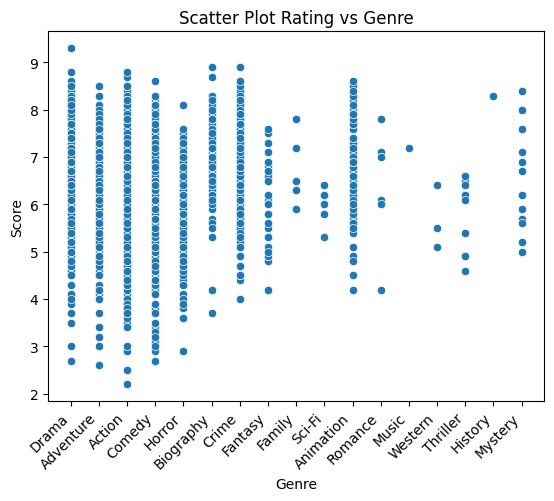

In [ ]:
print("Informasi dataset:")
movies_df.info()

# Scatter plot sementara untuk mengecek distribusi
sns.scatterplot(x='genre', y='score', data=movies_df)
plt.title('Scatter Plot Rating vs Genre')
plt.xlabel('Genre')
plt.ylabel('Score')

# Mendapatkan objek axes
ax = plt.gca()

# Mengatur rotasi untuk xticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

### **Data Preprocessing**

In [ ]:
# Memilih kolom yang diperlukan
clustering_df = movies_df[['score', 'genre']].copy()

# Menghapus nilai null
print("Cek Nilai Null:")
print(clustering_df.isnull().sum())
clustering_df.dropna(inplace=True)

# Encode genre menjadi numerik
label_encoder_genre = LabelEncoder()
clustering_df['genre'] = label_encoder_genre.fit_transform(clustering_df['genre'])

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_df)

# Tampilkan dataset setelah preprocessing
print("Dataset setelah preprocessing:")
clustering_df.describe()

Cek Nilai Null:
score    0
genre    0
dtype: int64
Dataset setelah preprocessing:


,score,genre
count,4000.000000,4000.000000
mean,6.321950,3.807750
std,0.977101,2.678635
min,2.200000,0.000000
25%,5.700000,1.000000
50%,6.400000,4.000000
75%,7.000000,6.000000
max,9.300000,16.000000


### **Elbow Method**

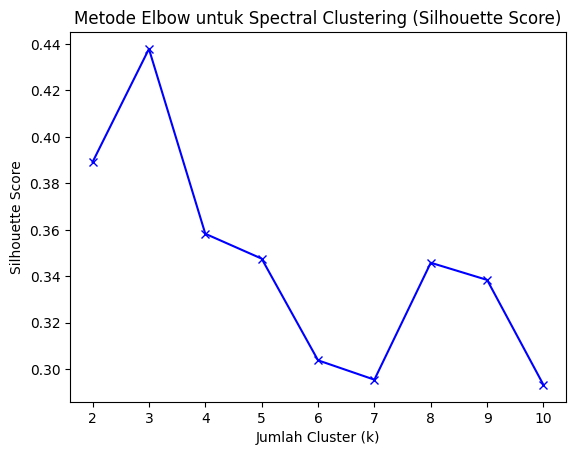

In [ ]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Inisialisasi list untuk menyimpan nilai Silhouette Score
silhouette_scores = []
# atau Davies-Bouldin Index:
# davies_bouldin_scores = []

# Tentukan rentang jumlah cluster yang ingin diuji (misalnya, 2 hingga 10)
K = range(2, 11)

# Looping untuk setiap nilai K
for k in K:
    # Buat dan latih model Spectral Clustering
    spectral = SpectralClustering(n_clusters=k, affinity='rbf', random_state=42)
    labels = spectral.fit_predict(X_scaled)  # X_scaled adalah data Anda yang telah dipreprocessing

    # Hitung Silhouette Score dan tambahkan ke list
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    # atau hitung Davies-Bouldin Index:
    # davies_bouldin_scores.append(davies_bouldin_score(X_scaled, labels))

# Plotting Silhouette Scores against K values
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
# Jika menggunakan Davies-Bouldin Index, ubah label sumbu y:
# plt.ylabel('Davies-Bouldin Index')
plt.title('Metode Elbow untuk Spectral Clustering (Silhouette Score)')
# Jika menggunakan Davies-Bouldin Index, ubah judul:
# plt.title('Metode Elbow untuk Spectral Clustering (Davies-Bouldin Index)')
plt.show()

### **Create Cluster**

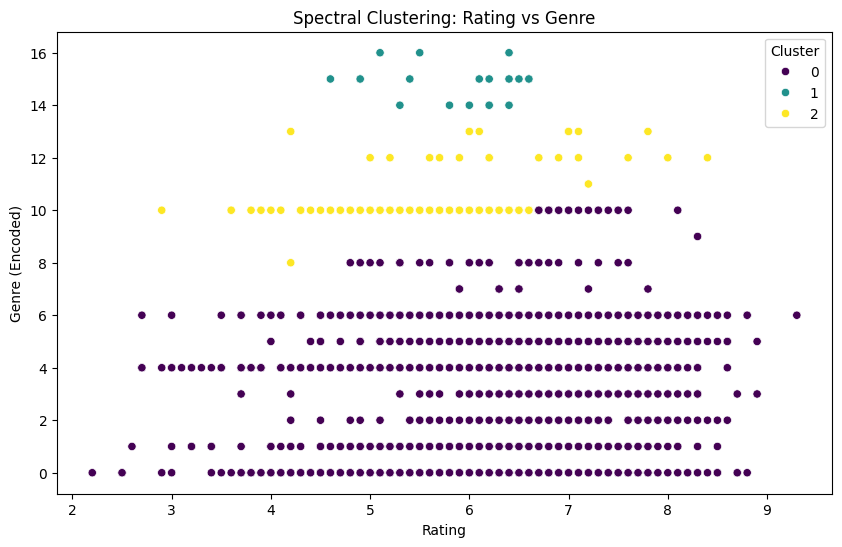

In [ ]:
# Spectral Clustering
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
clustering_df['cluster'] = spectral.fit_predict(X_scaled)

# Plot hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clustering_df['score'], y=clustering_df['genre'],
                hue=clustering_df['cluster'], palette='viridis')
plt.title('Spectral Clustering: Rating vs Genre')
plt.xlabel('Rating')
plt.ylabel('Genre (Encoded)')
plt.legend(title='Cluster')
plt.show()

### **Cluster Evaluation**

In [ ]:
sil_score = silhouette_score(X_scaled, clustering_df['cluster'])
dbi_score = davies_bouldin_score(X_scaled, clustering_df['cluster'])

print(f"Spectral Clustering - Silhouette Score: {sil_score}")
print(f"Spectral Clustering - Davies-Bouldin Index: {dbi_score}")

Spectral Clustering - Silhouette Score: 0.43785692552029626
Spectral Clustering - Davies-Bouldin Index: 0.7767639927141587
